In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [3]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


Random image being picked frm the input dataset

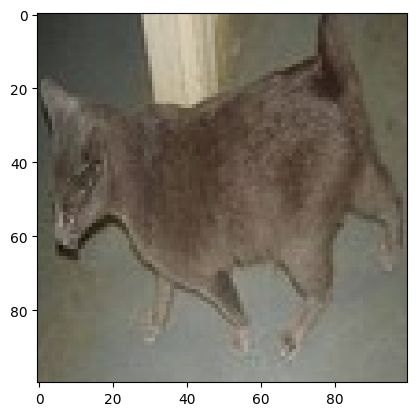

In [5]:
import random
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [43]:
from tensorflow.keras.layers import Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(256, activation='relu'))
Dropout(0.7)
model.add(Dense(1, activation='sigmoid'))

model add desnse 256 not helping in accuracy , dropout 0.7 and 0.5 is getting around 79% accuracy with epochs 20 and batch size 64

dropout 0.7 and 0.7 is accuracy 20%

dropout 0.7 and 0.4 is accuracy is 20%

In [52]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
model.fit(X_train, Y_train, epochs = 50, batch_size=256, validation_data=(X_test,Y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4984 - loss: 8.5156 - val_accuracy: 0.5000 - val_loss: 0.7222
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4752 - loss: 3.9394 - val_accuracy: 0.5000 - val_loss: 2.7772
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5073 - loss: 3.1935 - val_accuracy: 0.5000 - val_loss: 2.2482
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4980 - loss: 2.9619 - val_accuracy: 0.5000 - val_loss: 4.0142
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5119 - loss: 3.4539 - val_accuracy: 0.5000 - val_loss: 2.0508
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4925 - loss: 2.8754 - val_accuracy: 0.5000 - val_loss: 1.7984
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5230 - loss: 2.4070 - val_accuracy: 0.5000 - val_loss: 8.0065
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4789 - loss: 7.1234 - val_accuracy: 0.5000 - val_loss: 5.9626
Epoch 9/

In [57]:
model.evaluate(X_test, Y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7916 - loss: 0.5331


[0.7805753350257874, 0.5]

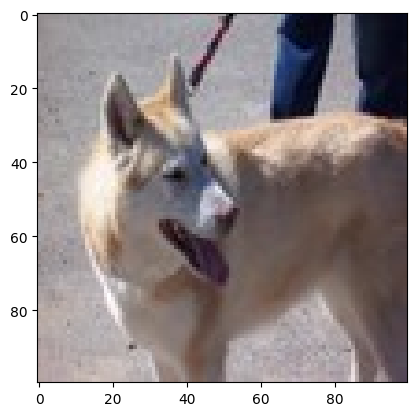

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Dog


In [ ]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    print("Dog")
else:
    print("Cat")